In [2]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

## Time series analysis

In [3]:
df_energy_climate_2020 = pd.read_csv('../../data/prepared/df_energy_climate_2020.csv')

In [4]:
# difference
df_energy_climate_2020['energy_price_diff'] = df_energy_climate_2020['energy_price'].diff()

# difference in percentage
df_energy_climate_2020['energy_price_diff_pct'] = df_energy_climate_2020['energy_price'].pct_change()

# moving average
df_energy_climate_2020['energy_price_moving_avg'] = df_energy_climate_2020['energy_price'].rolling(3, min_periods=1).mean()


df_energy_climate_2020['energy_price_moving_avg'].head(10)

0    38.600000
1    37.575000
2    35.823333
3    33.240000
4    31.103333
5    30.386667
6    30.103333
7    30.273333
8    30.433333
9    30.523333
Name: energy_price_moving_avg, dtype: float64

In [24]:
# check correlation with energy_price shifted one day later
df_energy_climate_2020['energy_price_shift'] = df_energy_climate_2020['energy_price'].shift()

df_energy_climate_2020.corr(numeric_only=True)

,wind_speed,solar_radiation,nuclear_power,not_renewable,renewable,energy_price,energy_price_diff,energy_price_diff_pct,energy_price_moving_avg,energy_price_shift
wind_speed,1.000000,0.096488,-0.050952,-0.379269,0.804260,-0.444114,0.057136,0.031028,-0.472748,-0.462998
solar_radiation,0.096488,1.000000,-0.254697,-0.186633,0.478710,-0.216114,-0.012361,-0.025255,-0.211590,-0.212017
nuclear_power,-0.050952,-0.254697,1.000000,0.407899,-0.135583,0.373059,0.008674,0.000301,0.378761,0.370190
not_renewable,-0.379269,-0.186633,0.407899,1.000000,-0.460238,0.797350,0.029841,-0.004245,0.804779,0.787579
renewable,0.804260,0.478710,-0.135583,-0.460238,1.000000,-0.513584,-0.060192,0.000382,-0.504660,-0.493715
energy_price,-0.444114,-0.216114,0.373059,0.797350,-0.513584,1.000000,0.165374,0.017544,0.960193,0.945429
energy_price_diff,0.057136,-0.012361,0.008674,0.029841,-0.060192,0.165374,1.000000,0.099069,-0.097464,-0.164991
energy_price_diff_pct,0.031028,-0.025255,0.000301,-0.004245,0.000382,0.017544,0.099069,1.000000,-0.008278,-0.015203
energy_price_moving_avg,-0.472748,-0.211590,0.378761,0.804779,-0.504660,0.960193,-0.097464,-0.008278,1.000000,0.992455
energy_price_shift,-0.462998,-0.212017,0.370190,0.787579,-0.493715,0.945429,-0.164991,-0.015203,0.992455,1.000000


## Auto correlation

In [5]:
import statsmodels.api as sm

In [9]:
df_energy_2021 = pd.read_csv('../../data/prepared/df_energy_2021.csv')
df_energy_2020 = pd.read_csv('../../data/prepared/df_energy_2020.csv')



In [10]:
df_energy_2020_2021 = pd.concat([df_energy_2020, df_energy_2021])

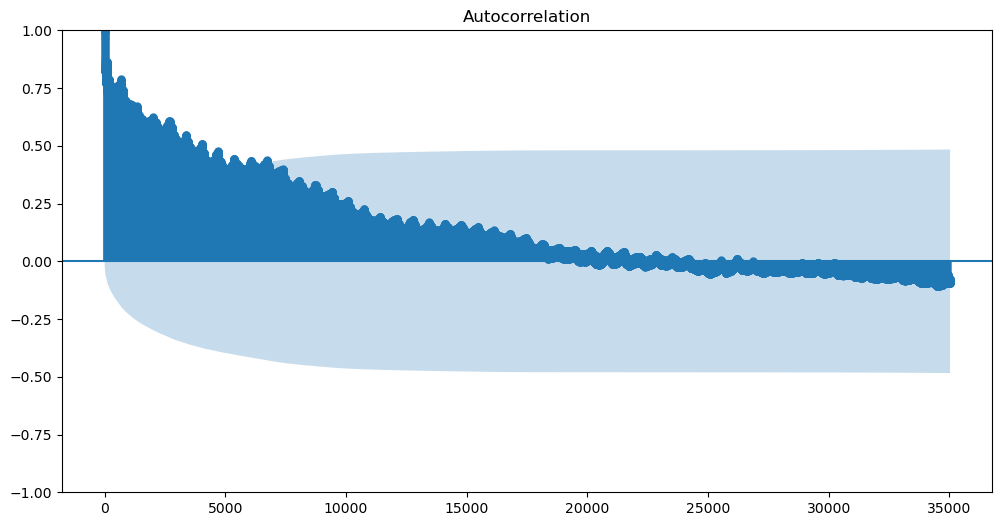

In [11]:
plt.rc('figure', figsize=(12,6))
res = sm.graphics.tsa.plot_acf(df_energy_2020_2021['energy_price'], lags=35030)

In [12]:
# sm.tsa.stattools.acf(df_energy_2020_2021['energy_price'], nlags=1)

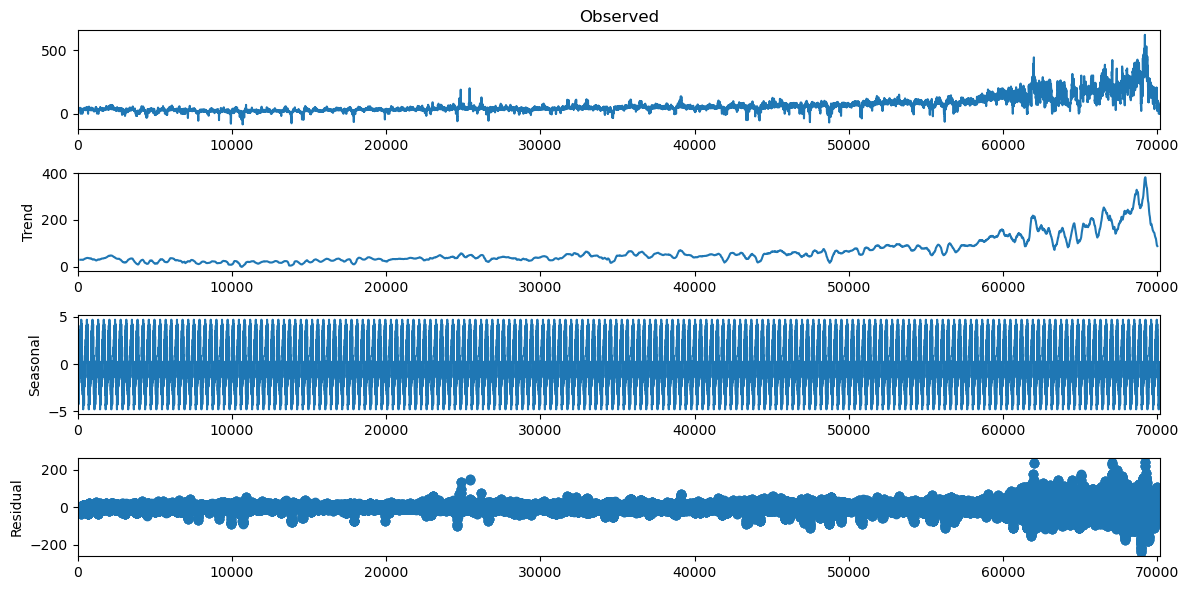

In [13]:
trends = sm.tsa.seasonal_decompose(df_energy_2020_2021['energy_price'].values, period=365).plot()

## Exponential Smoothing

#### Holt-Winters model
- has Trend
- has Seasonality
- Not random

In [14]:
# Exponential smoothing
sr_exp_smoothing = df_energy_2020.copy()
sr_exp_smoothing.set_index('datetime', inplace=True)
# resample the data - take day as unit(use mean value)
sr_exp_smoothing = sr_exp_smoothing['energy_price'].resample(rule='D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# set figure size
rcParams['figure.figsize'] = 8,6
# plot
sr_exp_smoothing.plot()

In [ ]:
# Build a model
model = ExponentialSmoothing(endog=sr_exp_smoothing).fit()

In [ ]:
# create prediction for 60 days
predictions = model.forecast(60)

In [ ]:
# set figure size
sr_exp_smoothing.plot(figsize = (8, 6))
# Plot predictions
predictions.plot()